<center><span style="color:#336E7B; font-size:300%; font-family:Impact">Image Compression (SVD)</span></center>
<center><span style="color:#34495E; font-size:200%; font-family:Impact; line-height: 50px">Sean Wade</span></center>
<hr style="height: 2px">

In [1]:
from scipy import linalg as la
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import matplotlib.pylab as pylab

In [2]:
%matplotlib inline

<div style="background-color: #E3F8FA; width: 100%; padding:26px; border">
<b><span style="color:#04353B; font-size:150%; font-family:Maraco">The Singular Value Decompostion</span></b>
<p style="line-height: 25px">
The singular value decomposition has been very important in linear algebra theory and has many applications in data compression.
</p>

<p style="line-height: 25px">
This matrix decomposition araises from the fact that every $mxn$ matrix $A$ can be represented in the form:
$$A = U\Sigma V^H$$
Where $U$ and $V^H$ are orthonormal matricies and $\Sigma$ is a diagonal matrix of the singular values.
</p>

</div>

In [3]:
def truncated_svd(A,r=None,tol=10**-6):
    """Computes the truncated SVD of A. If r is None or equals the number 
        of nonzero singular values, it is the compact SVD.
    Parameters:
        A: the matrix
        r: the number of singular values to use
        tol: the tolerance for zero
    Returns:
        U - the matrix U in the SVD
        s - the diagonals of Sigma in the SVD
        Vh - the matrix V^H in the SVD
    """
    # Full SVD:  mxm mxn nXn
    # Truncated SVD:   mxr rxr rxn
    m, n = A.shape
    if r > n:
        r = n
    e_val, e_vec = la.eig(np.dot(A.conjugate().T, A))
    sing_val = np.sqrt(e_val)[:r]
    sort_index = np.argsort(sing_val)[::-1]
    S = e_val[sort_index]
    V = e_vec[:,sort_index]

    U = np.zeros((m, r))
    for i in xrange(r):
        U[:,i] = ((1/S[i]) * (A.dot(np.vstack(V[:,i])))).T
    
    S = np.diag(S)
    Vh = V.conjugate().T
    return U, S, Vh 

In [29]:
A = np.matrix([[2,0,8,6,0],[1,6,0,1,7],[5,0,7,4,0],[7,0,8,5,0],[0,10,0,0,7]])

In [30]:
u,s,v = truncated_svd(A, 9)
print "U: \n", u
print "S: \n", s
print "Vt: \n", v
svd = u.dot(s.dot(v))
print np.allclose(svd, A)

U: 
[[-0.03026254 -0.0042841  -0.23053216  0.05329357 -0.35613724]
 [-0.00568202  0.03911713  0.03158012  0.39719393  0.17241886]
 [-0.02929693 -0.00391406  0.05975547 -0.05833111  2.3278797 ]
 [-0.03598934 -0.00464073  0.14274506 -0.03018943 -1.61012747]
 [-0.00359939  0.05252852 -0.02525522 -0.29845093 -0.12623544]]
S: 
[[  3.21068014e+02+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j
    0.00000000e+00+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   2.30170525e+02+0.j   0.00000000e+00+0.j
    0.00000000e+00+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   1.27021105e+01+0.j
    0.00000000e+00+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j
    3.93716136e+00+0.j   0.00000000e+00+0.j]
 [  0.00000000e+00+0.j   0.00000000e+00+0.j   0.00000000e+00+0.j
    0.00000000e+00+0.j   1.22189164e-01+0.j]]
Vt: 
[[ -4.64617132e-01  -7.00859862e-02  -7.35093538e-01  -4.84391665e-01
   -6.49698348e-02]
 [ -2.15065094e-02   7.5998796

/Users/seanwade/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


<div style="background-color: #E3F8FA; width: 100%; padding:26px; border">
<b><span style="color:#04353B; font-size:150%; font-family:Maraco">Visualizing the SVD</span></b>

</div>

In [32]:
def visualize_svd():
    """Plot each transformation associated with the SVD of A."""
    A = np.matrix([[3,1],[1,3]])
    U, SIGMA, V_T = la.svd(A)
    SIGMA = np.diag(SIGMA)
    circle_points = np.load('circle.npz')['circle']
    unit_vectors = np.load('circle.npz')['unit_vectors']
    
    # PLOT THE CHANGE ON THE UNIT CIRCLE
    #-----------------------------------------------
    plt.subplot(221)
    plt.title(r'$S$')
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    plt.plot(circle_points[0,:], circle_points[1,:])
    plt.plot(unit_vectors[0,:], unit_vectors[1,:])
    
    plt.subplot(222)
    plt.title(r'$V^HS$')
    plt.xlim(-1.5,1.5)
    plt.ylim(-1.5,1.5)
    V_T_S = np.dot(V_T, circle_points)
    unit_V_T_S = np.dot(V_T, unit_vectors)
    plt.plot(V_T_S[0,:], V_T_S[1,:])
    plt.plot(unit_V_T_S[0,:], unit_V_T_S[1,:])
    
    plt.subplot(223)
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.title(r'$\sum V^HS$', y=1.02)
    S_V_T_S = np.dot(SIGMA, V_T_S)
    unit_S_V_T_S = np.dot(SIGMA, unit_V_T_S)
    plt.plot(S_V_T_S[0,:], S_V_T_S[1,:])
    plt.plot(unit_S_V_T_S[0,:], unit_S_V_T_S[1,:])
    
    plt.subplot(224)
    plt.title(r'$U \sum V^HS$', y=1.02)
    U_S_V_T_S = np.dot(U, S_V_T_S)
    unit_U_S_V_T_S = np.dot(U, unit_S_V_T_S)
    plt.plot(U_S_V_T_S[0,:], U_S_V_T_S[1,:])
    plt.plot(unit_U_S_V_T_S[0,:], unit_U_S_V_T_S[1,:])
    
    plt.suptitle("SVD Visualization")
    plt.show()
    

In [33]:
pylab.rcParams['figure.figsize'] = 10, 10

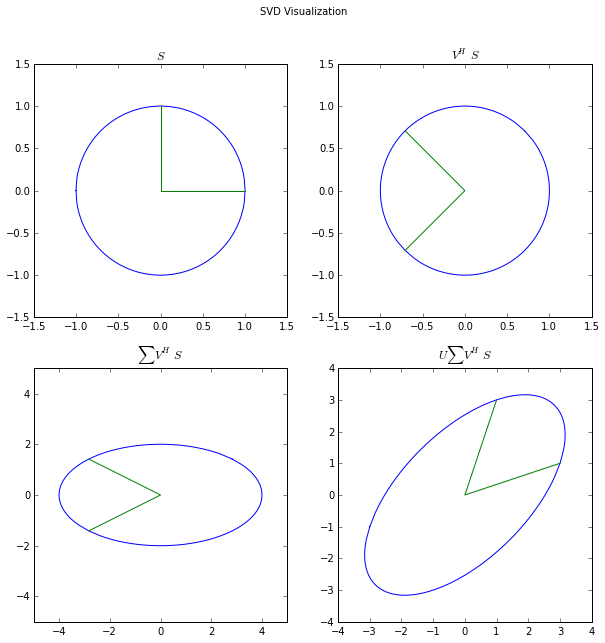

In [34]:
visualize_svd()

<div style="background-color: #E3F8FA; width: 100%; padding:26px; border">
<b><span style="color:#04353B; font-size:150%; font-family:Maraco">Approximations</span></b>
<p style="line-height: 25px">
As seen in the visulization above, the singular values of the decomposition carry the most information about the image.  It has been proven that to create the best quality approximation we must only alter the number of singualar values.
</p>

<p style="line-height: 25px">
The next code uses the truncated SVD to maintain a $k$ based approximation of a JPEG image.
</div>

In [24]:
def svd_approx(A, k):
    """Returns best rank k approximation to A with respect to the induced 2-norm.
    
    Inputs:
    A - np.ndarray of size mxn
    k - rank 
    
    Return:
    Ahat - the best rank k approximation
    """
    U, S, Vh = la.svd(A, full_matrices=False)
    S = np.diag(S[:k])
    Ahat = U[:,:k].dot(S).dot(Vh[:k,:])
    return Ahat

In [25]:
def lowest_rank_approx(A,e):
    """Returns the lowest rank approximation of A with error less than e 
    with respect to the induced 2-norm.
    
    Inputs:
    A - np.ndarray of size mxn
    e - error
    
    Return:
    Ahat - the lowest rank approximation of A with error less than e.
    """
    U, S, Vh = la.svd(A, full_matrices=False)
    i = 0
    for sig_val in S:
        if sig_val < e:
            k = i
        else:
            i += 1
            
    return svd_approx(A, k)

In [35]:
def compress_image(filename,k):
    """Plot the original image found at 'filename' and the rank k approximation
    of the image found at 'filename.'
    
    filename - jpg image file path
    k - rank
    """
    IMG = plt.imread(filename)
    R_IMG_APROX = svd_approx(IMG[:,:,0].astype(float), k)
    G_IMG_APROX = svd_approx(IMG[:,:,1].astype(float), k)
    B_IMG_APROX = svd_approx(IMG[:,:,2].astype(float), k)
    R_IMG_APROX[R_IMG_APROX > 255] = 255
    R_IMG_APROX[R_IMG_APROX < 0] = 0
    G_IMG_APROX[G_IMG_APROX > 255] = 255
    G_IMG_APROX[G_IMG_APROX < 0] = 0
    B_IMG_APROX[B_IMG_APROX > 255] = 255
    B_IMG_APROX[B_IMG_APROX < 0] = 0
    imag_aprox = np.dstack([R_IMG_APROX.astype(np.uint8), G_IMG_APROX.astype(np.uint8), B_IMG_APROX.astype(np.uint8)])
    plt.subplot(121)
    plt.axis("off")
    plt.title("Original Image")
    plt.imshow(IMG)
    plt.subplot(122)
    plt.axis("off")
    plt.title("Rank %s Approximation" % k)
    plt.imshow(imag_aprox)

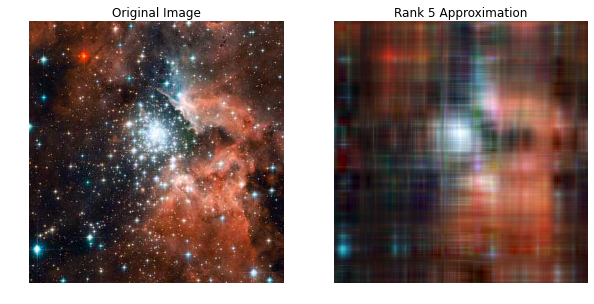

In [36]:
compress_image('hubble_image.jpg',5)

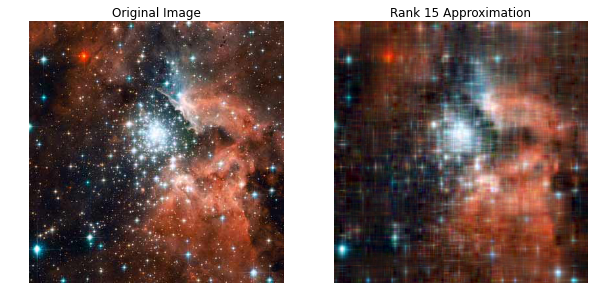

In [41]:
compress_image('hubble_image.jpg',15)

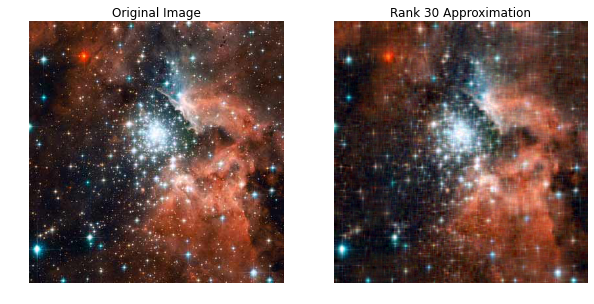

In [42]:
compress_image('hubble_image.jpg',30)

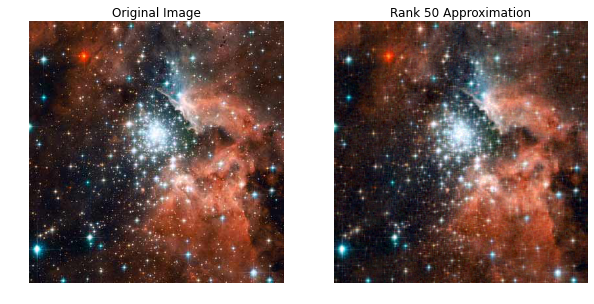

In [43]:
compress_image('hubble_image.jpg',50)

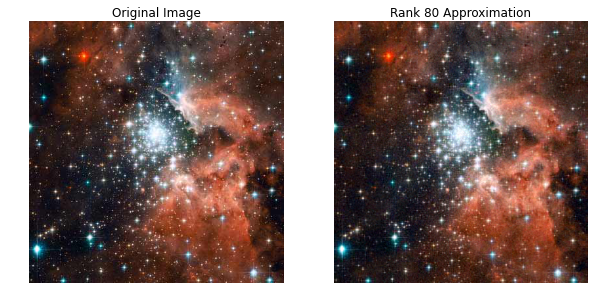

In [44]:
compress_image('hubble_image.jpg',80)

<div style="background-color: #E3F8FA; width: 100%; padding:26px; border">
<p style="line-height: 25px">
It is remarkable to see that using only 80 of the 760 singular values gives an almost identical approximation of the image using much much less information!
</p>

</div>